# 第一步：数据准备

Wine（葡萄酒）数据集是一个经典的机器学习数据集，用于分类任务。这个数据集是由美国加州大学欧文分校的计算机科学系的许多年前收集的。该数据集由13个特征组成，描述了三个不同种类的葡萄酒。这三个类别分别是不同来源的葡萄酒，通常被标记为类别0、1和2。

这个数据一共有178行（代表有178个样本）,14 列（代表有13个特征+1列是标签）

## 数据读取

In [1]:
import pandas as pd

#读取数据为dataframe格式
df = pd.read_csv('wine_data.csv')
# 查看数据的前几行，默认显示前5行
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 数据探索

In [2]:
# 显示数据集的形状，即数据集中样本的数量和特征的数量。从结果可以看出，这个数据一共有178行（代表有178个样本）,14 列（代表有13个特征+1列是标签）
df.shape

(178, 14)

In [3]:
#也可以看出，一共有三类
df["target"].unique()

array([0, 1, 2], dtype=int64)

In [4]:
# 显示数据集中数值型特征的统计摘要，包括均值、标准差、最小值、25%分位数、中位数、75%分位数和最大值。
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## 划分训练集和测试集

In [5]:
# 数据集中包含特征和目标变量，要把他们划分开

# 特征矩阵，不包含目标变量。df中去除target列以外的列就是特征。
X = df.drop('target', axis=1) 

# df的target列是目标变量
y = df['target']

In [6]:
 # 导入train_test_split函数，用于划分训练集和测试集
from sklearn.model_selection import train_test_split 



In [7]:
#划分训练集和测试集，将数据集分为训练集（80%）和测试集（20%）
# test_size=0.2 这个参数就代表20%的样本做测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 模型训练

In [8]:
 # 导入准确率和分类报告指标
from sklearn.metrics import accuracy_score, classification_report 


## 逻辑回归 （Logistic Regression，LR）

### 先训练一遍模型

In [9]:
from sklearn.linear_model import LogisticRegression  # 导入LogisticRegression模型

# 初始化逻辑回归模型
model = LogisticRegression()

# 在训练集上训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算模型准确率
# y_test: 这是测试集的真实标签
# y_pred: 这是刚才逻辑回归模型对测试集中每个样本的预测类别。
# 将真实标签 y_test和 模型预测类别 y_pred 输入到从sklearn中导入的accuracy_score函数中，计算准确率。
accuracy = accuracy_score(y_test, y_pred)
print("逻辑回归模型准确率：", accuracy)

# 打印分类报告，包括精确率、召回率、F1分数等指标
print("\n逻辑回归分类报告：")
print(classification_report(y_test, y_pred))

逻辑回归模型准确率： 0.9722222222222222

逻辑回归分类报告：
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 结果分析(后同）

* 精确率（Precision）：
    * 类别0（第一类葡萄酒）的精确率为1.00，表示在所有被模型预测为第一类葡萄酒的样本中，有100%确实属于第一类葡萄酒。
    * 类别1（第二类葡萄酒）的精确率为0.93，表示在所有被模型预测为第二类葡萄酒的样本中，有93%确实属于第二类葡萄酒。
    * 类别2（第三类葡萄酒）的精确率为1.00，表示在所有被模型预测为第三类葡萄酒的样本中，有100%确实属于第三类葡萄酒。
    * 在三个类别中，模型的精确率都相对较高，这说明模型对每个类别的分类都比较准确。
* 召回率（Recall）：
    * 类别0的召回率为0.93，表示在所有实际为第一类葡萄酒的样本中，有93%被模型正确地预测为第一类葡萄酒。
    * 类别1的召回率为1.00，表示在所有实际为第二类葡萄酒的样本中，有100%被模型正确地预测为第二类葡萄酒。
    * 类别2的召回率为1.00，表示在所有实际为第三类葡萄酒的样本中，有100%被模型正确地预测为第三类葡萄酒。
    * 模型对于第二类和第三类葡萄酒的召回率都达到了100%，说明模型能够很好地捕捉到这两个类别的样本。
* F1分数（F1-score）：
    * F1分数是精确率和召回率的调和平均值，综合考虑了模型的分类准确度和漏报率。
    * 三个类别的F1分数都比较高，说明模型在各个类别上的性能都比较均衡。
* 支持数（Support）：
    * 支持数表示每个类别在测试集中的样本数量。在这个报告中，每个类别的支持数分别为14、14和8。
* 准确率（Accuracy）：
    * 准确率是模型在所有预测中正确预测的比例，计算公式为：(TP + TN) / (TP + TN + FP + FN)。
    * 这个模型的准确率为0.97，说明模型在测试集上的整体性能比较好。


## 决策树（Decision Tree，DT）

### 先训练一遍模型

In [10]:
from sklearn.tree import DecisionTreeClassifier

# 决策树模型
# 可以调整的参数有：
    # max_depth: 决策树的最大深度，用于控制树的复杂度。默认值：None，还可以试试 10, 15。限制max_depth，可以防止模型在训练集上过度学习。
    # min_samples_split: 节点分裂的最小样本数，也就是限制节点再划分所需的最小样本数，用于控制过拟合，默认值：2。增加min_samples_split，可以防止模型过于复杂，提高泛化能力。
    # min_samples_leaf: 默认值：1，叶子节点的最小样本数，用于控制过拟合，可以尝试2, 5, 10等。增加min_samples_leaf，可以防止模型对训练数据中的噪声过于敏感。
# 大家可以试试换一下这些参数后，对最后的预测结果有什么影响



dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=2)

# 在训练集上训练决策树模型
dt_model.fit(X_train, y_train)

# 用刚才训练好的名字叫dt_model的决策树模型，在测试集上进行预测
y_pred = dt_model.predict(X_test)


# 计算模型准确率
# y_test: 这是测试集的真实标签
# y_pred: 这是刚才决策树模型对测试集中每个样本的预测类别。
# 将真实标签 y_test和 模型预测类别 y_pred 输入到从sklearn中导入的accuracy_score函数中，计算准确率。
# 也就是说，计算准确率，不用自己写代码，调用这个accuracy_score函数就可以了
accuracy = accuracy_score(y_test, y_pred)
print("决策树模型准确率：", accuracy)

# 打印分类报告，包括精确率、召回率、F1分数等指标
print("\n决策树分类报告：")
print(classification_report(y_test, y_pred))



决策树模型准确率： 0.9444444444444444

决策树分类报告：
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



### 十折交叉验证

k折交叉验证（k-fold cross-validation）：

将数据集均匀地划分成k个子集，每个子集都有机会作为测试集，其余作为训练集。然后看K次的平均值和方差以衡量模型在k折交叉验证中的整体性能和稳定性。

一般来说K=10或者5,这里用K=10


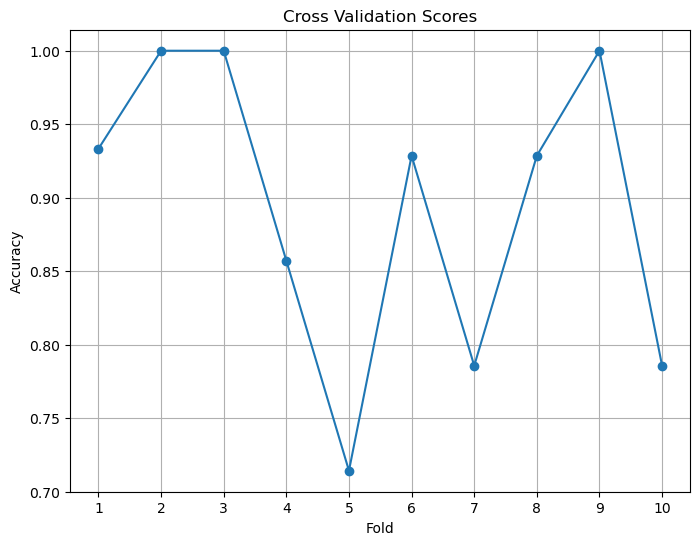

In [11]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义 决策树 模型
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1)

# 进行十折交叉验证，返回十个验证准确率的数组
cross_val_scores = cross_val_score(dt_model, X_train, y_train, cv=10)

# 定义 X 轴的数据，即交叉验证的折数
x_values = range(1, 11)

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(x_values, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [12]:
print("这十次的准确率分别是：\n",cross_val_scores)
print("这十次的准确率的均值是：\n",cross_val_scores.mean())

这十次的准确率分别是：
 [0.93333333 1.         1.         0.85714286 0.71428571 0.92857143
 0.78571429 0.92857143 1.         0.78571429]
这十次的准确率的均值是：
 0.8933333333333333


In [13]:
## 注意


可以看到如下图中的结果，每一次训练，换用不同的子集作为训练集，所得到的‘准确率”（纵轴），是有波动的。虽然第一次达到了100%的准确率，但是第三次就不是了。因此，不能因为看到了一个机器学习模型，在一个训练集上训练达到了100%的准确率，就认为这个机器学习模型是完美的，因为这里有一些“巧合”的成分。我们应该关注的是，在不用的训练集上，准确率都比较高的模型，比如，看十次的准确率的均值最高的模型。

## 随机森林（Random Forest，RF）

### 先训练一遍模型

In [14]:
from sklearn.ensemble import RandomForestClassifier

# 随机森林模型
# 可以调整的参数有：
#     n_estimators: 随机森林中树的数量，增加数量可以提高模型的稳定性和性能。默认值：100。
#     max_depth: 决策树的最大深度，用于控制树的复杂度。
#     min_samples_split: 节点分裂的最小样本数，用于控制过拟合。
#     min_samples_leaf: 叶子节点的最小样本数，用于控制过拟合。


# 大家可以试试换一下这些参数后，对最后的预测结果有什么影响
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)
# 在训练集上训练随机森林模型
rf_model.fit(X_train, y_train)

# 用刚才训练好的名字叫rf_model的随机森林模型，在测试集上进行预测
rf_y_pred = rf_model.predict(X_test)

# 计算模型准确率
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("随机森林模型准确率：", rf_accuracy)

# 打印分类报告，包括精确率、召回率、F1分数等指标
print("\n随机森林分类报告：")
print(classification_report(y_test, rf_y_pred))

随机森林模型准确率： 1.0

随机森林分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



！！！可以看到 随机森林的各个指标都达到了 100%,说明这个方法表现优异！

In [15]:
# 可以打印预测值rf_y_pred和真实值y_test，看看是不是一样的
print("rf_y_pred",rf_y_pred)
print("y_test",y_test.values)

rf_y_pred [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
y_test [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]


### 十折交叉验证

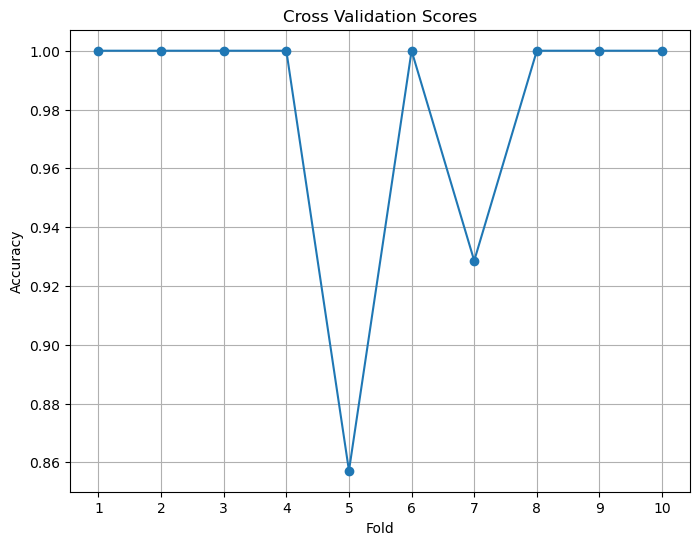

In [16]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义 随机森林 模型
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# 进行十折交叉验证，返回十个验证准确率的数组
cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=10)

# 定义 X 轴的数据，即交叉验证的折数
x_values = range(1, 11)

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(x_values, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [17]:
print("这十次的准确率分别是：\n",cross_val_scores)
print("这十次的准确率的均值是：\n",cross_val_scores.mean())

这十次的准确率分别是：
 [1.         1.         1.         1.         0.85714286 1.
 0.92857143 1.         1.         1.        ]
这十次的准确率的均值是：
 0.9785714285714284


In [18]:
# 可以看出的是随机森林在十次的效果上都不错，效果比较稳定，这是一个好模型。

## 支持向量机（Support Vector Machine，SVM）

### 先训练一遍模型

In [19]:
from sklearn.svm import SVC
# 支持向量机模型
# 可以调整的参数有：
# C:正则化参数，默认值 1.0。
# 控制决策边界的软硬程度。C越大，决策边界越硬，容错性越低。
# 较小的C值（例如0.1）可以增加模型容错性，较大的C值（例如10）可以减小容错性。
# kernel:核函数的选择，决定数据映射到高维空间的方式，常用的有线性核、多项式核和径向基核（RBF）。
# 'linear'线性核适用于线性可分的情况，'rbf'适用于非线性可分的情况。


svm_model = SVC(C=1, kernel='rbf')

# 在训练集上训练支持向量机模型
svm_model.fit(X_train, y_train)

# 用刚才训练好的名字叫svm_model的svm模型，在测试集上进行预测
svm_y_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("\n支持向量机模型准确率：", svm_accuracy)
print("\n支持向量机分类报告：")
print(classification_report(y_test, svm_y_pred))


支持向量机模型准确率： 0.8055555555555556

支持向量机分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36



### 十折交叉验证

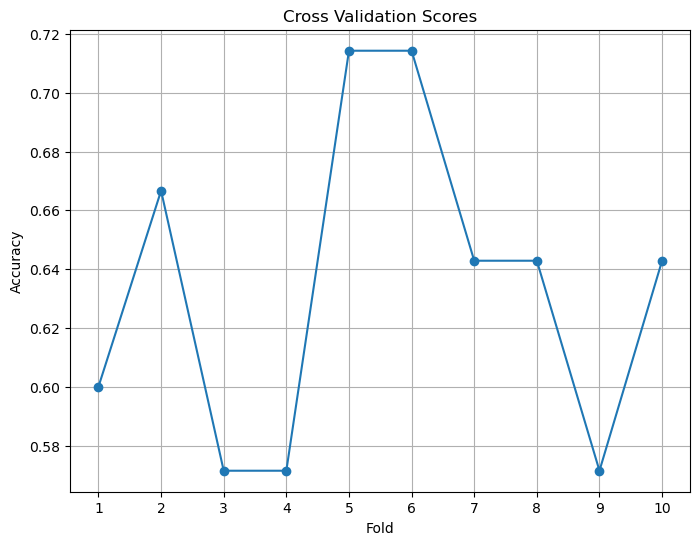

In [20]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义 svm 模型
svm_model = SVC(C=1, kernel='rbf')

# 进行十折交叉验证，返回十个验证准确率的数组
cross_val_scores = cross_val_score(svm_model, X_train, y_train, cv=10)

# 定义 X 轴的数据，即交叉验证的折数
x_values = range(1, 11)

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(x_values, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [21]:
print("这十次的准确率分别是：\n",cross_val_scores)
print("这十次的准确率的均值是：\n",cross_val_scores.mean())

这十次的准确率分别是：
 [0.6        0.66666667 0.57142857 0.57142857 0.71428571 0.71428571
 0.64285714 0.64285714 0.57142857 0.64285714]
这十次的准确率的均值是：
 0.6338095238095238


## KNN（K-Nearest Neighbors，KNN）

### 先训练一遍模型

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# K最近邻模型
# 可以调整的参数有：
#     n_neighbors: 选择最近邻的数量。
#     weights: 设置邻居的权重，可以是uniform（所有邻居权重相同）或distance（距离越近的邻居权重越大）。

knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("\nK最近邻模型准确率：", knn_accuracy)
print("\nK最近邻模型分类报告：")
print(classification_report(y_test, knn_y_pred))


K最近邻模型准确率： 0.7222222222222222

K最近邻模型分类报告：
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



### 十折交叉验证

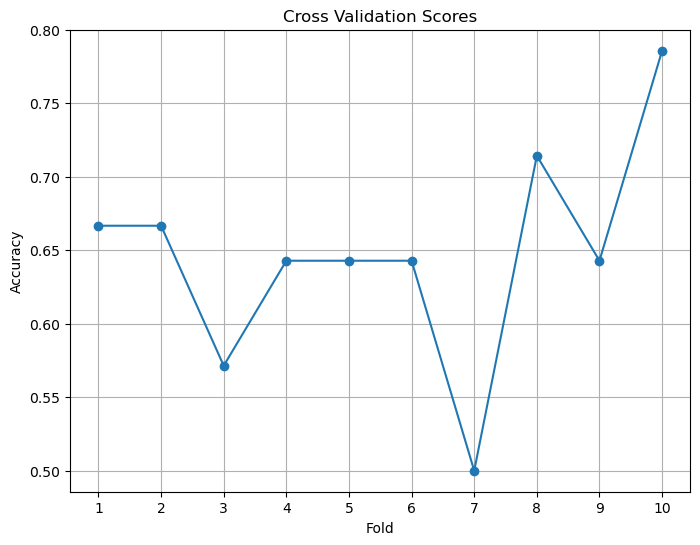

In [23]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义 KNN 模型
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')


# 进行十折交叉验证，返回十个验证准确率的数组
cross_val_scores = cross_val_score(knn_model, X_train, y_train, cv=10)

# 定义 X 轴的数据，即交叉验证的折数
x_values = range(1, 11)

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(x_values, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [24]:
print("这十次的准确率分别是：\n",cross_val_scores)
print("这十次的准确率的均值是：\n",cross_val_scores.mean())

这十次的准确率分别是：
 [0.66666667 0.66666667 0.57142857 0.64285714 0.64285714 0.64285714
 0.5        0.71428571 0.64285714 0.78571429]
这十次的准确率的均值是：
 0.6476190476190476


可以看到KNN的效果非常不好

## 朴素贝叶斯（Naive Bayes Classifier，NB）

### 先训练一遍模型

In [25]:
from sklearn.naive_bayes import GaussianNB

# 朴素贝叶斯模型
nb_model = GaussianNB()

# 在训练集上训练朴素贝叶斯模型
nb_model.fit(X_train, y_train)

# 用训练好的朴素贝叶斯模型在测试集上进行预测
nb_y_pred = nb_model.predict(X_test)

# 计算模型准确率
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print("朴素贝叶斯模型准确率：", nb_accuracy)
print("\n朴素贝叶斯模型分类报告：")
print(classification_report(y_test, nb_y_pred))


朴素贝叶斯模型准确率： 1.0

朴素贝叶斯模型分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### 十折交叉验证

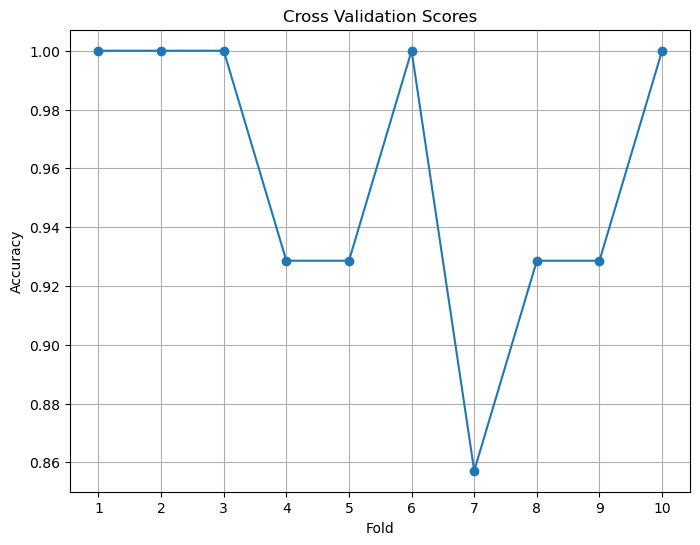

In [26]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义 nb 模型
nb_model = GaussianNB()


# 进行十折交叉验证，返回十个验证准确率的数组
cross_val_scores = cross_val_score(nb_model, X_train, y_train, cv=10)

# 定义 X 轴的数据，即交叉验证的折数
x_values = range(1, 11)

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(x_values, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [27]:
print("这十次的准确率分别是：\n",cross_val_scores)
print("这十次的准确率的均值是：\n",cross_val_scores.mean())

这十次的准确率分别是：
 [1.         1.         1.         0.92857143 0.92857143 1.
 0.85714286 0.92857143 0.92857143 1.        ]
这十次的准确率的均值是：
 0.9571428571428571


## 梯度提升树（Gradient Boosting Trees，GBT）

### 先训练一遍模型

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

# 梯度提升模型
# 可以调整的参数有：
#     learning_rate: 学习率，默认值：0.1。控制每次迭代的步长，也就是控制每次迭代的权重更新幅度。越小学的越精细，但时间也会更长。可以再试试0.001
#     n_estimators: 提升树的数量。默认值：100。调参思路：可以从较小的值开始，例如50，以加快模型训练。再逐步增加，找到一个合适的数量，避免过拟合。
#     max_depth: 每棵树的最大深度，默认值：3，尝试不同的深度值，可以调整模型的复杂度（越深越复杂），避免过拟合或者欠拟合。
gb_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)

# 在训练集上训练梯度提升模型
gb_model.fit(X_train, y_train)

# 用训练好的梯度提升模型在测试集上进行预测
gb_y_pred = gb_model.predict(X_test)

# 计算模型准确率
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print("梯度提升模型准确率：", gb_accuracy)
print("\n分类报告：")
print(classification_report(y_test, gb_y_pred))


梯度提升模型准确率： 0.9444444444444444

分类报告：
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.93      0.93      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



### 十折交叉验证

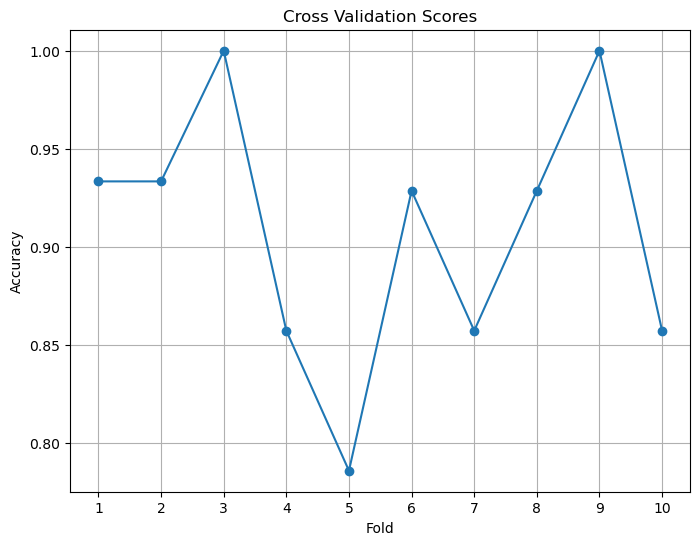

In [29]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义 gbt 模型
gb_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)

# 进行十折交叉验证，返回十个验证准确率的数组
cross_val_scores = cross_val_score(gb_model, X_train, y_train, cv=10)

# 定义 X 轴的数据，即交叉验证的折数
x_values = range(1, 11)

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(x_values, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [30]:
print("这十次的准确率分别是：\n",cross_val_scores)
print("这十次的准确率的均值是：\n",cross_val_scores.mean())

这十次的准确率分别是：
 [0.93333333 0.93333333 1.         0.85714286 0.78571429 0.92857143
 0.85714286 0.92857143 1.         0.85714286]
这十次的准确率的均值是：
 0.9080952380952383


## 多层感知机模型（Multilayer Perceptron,MLP）

### 先训练一遍模型

In [31]:
from sklearn.neural_network import MLPClassifier

# 多层感知机模型（MLP）
# 可以调整的参数有：
#     hidden_layer_sizes: 隐藏层的大小。
#     activation: 激活函数的类型，如'relu'、'logistic'、'tanh'等。
#     solver: 优化算法的选择，如'adam'、'sgd'等。
#     max_iter:用于指定训练模型的最大迭代次数。当模型达到指定的最大迭代次数后，即使模型尚未收敛，训练也会停止。
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)

# 在训练集上训练多层感知机模型
mlp_model.fit(X_train, y_train)

# 用训练好的多层感知机模型在测试集上进行预测
mlp_y_pred = mlp_model.predict(X_test)

# 计算模型准确率
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
print("多层感知机模型准确率：", mlp_accuracy)
print("\n多层感知机分类报告：")
print(classification_report(y_test, mlp_y_pred))


多层感知机模型准确率： 0.9722222222222222

多层感知机分类报告：
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


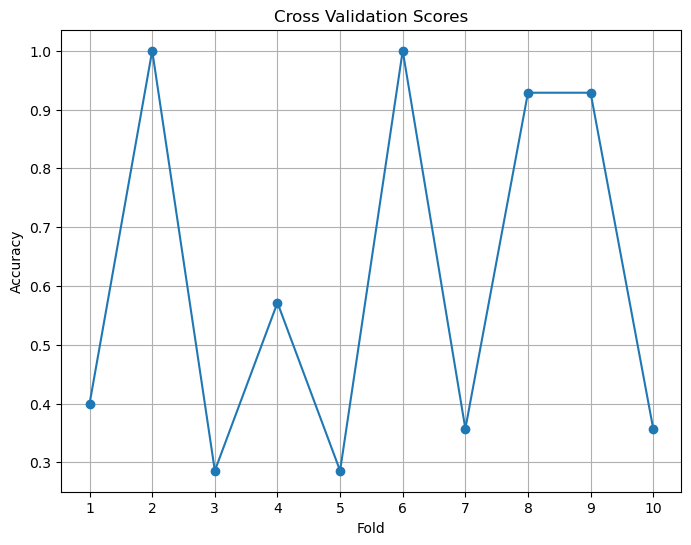

In [32]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义 MLP 模型
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)

# 进行十折交叉验证，返回十个验证准确率的数组
cross_val_scores = cross_val_score(mlp_model, X_train, y_train, cv=10)

# 定义 X 轴的数据，即交叉验证的折数
x_values = range(1, 11)

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(x_values, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [33]:
print("这十次的准确率分别是：\n",cross_val_scores)
print("这十次的准确率的均值是：\n",cross_val_scores.mean())

这十次的准确率分别是：
 [0.4        1.         0.28571429 0.57142857 0.28571429 1.
 0.35714286 0.92857143 0.92857143 0.35714286]
这十次的准确率的均值是：
 0.6114285714285714


## AdaBoost

### 先训练一遍模型

In [34]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost 模型
# 可以调整的参数有：
#     base_estimator: 基础估计器，可以是决策树、神经网络等。
#     n_estimators: 弱学习器的数量。
#     learning_rate: 学习率，用于控制每个弱学习器的权重更新幅度。
adaboost_model = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0)

# 在训练集上训练 AdaBoost 模型
adaboost_model.fit(X_train, y_train)

# 用训练好的 AdaBoost 模型在测试集上进行预测
adaboost_y_pred = adaboost_model.predict(X_test)

# 计算模型准确率
adaboost_accuracy = accuracy_score(y_test, adaboost_y_pred)
print("AdaBoost 模型准确率：", adaboost_accuracy)
print("\nAdaBoost 分类报告：")
print(classification_report(y_test, adaboost_y_pred))


InvalidParameterError: The 'base_estimator' parameter of AdaBoostClassifier must be an object implementing 'fit' and 'predict' or a str among {'deprecated'}. Got None instead.

### 十折交叉验证

In [ ]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义 adaboost_model 模型
adaboost_model = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0)

# 进行十折交叉验证，返回十个验证准确率的数组
cross_val_scores = cross_val_score(adaboost_model, X_train, y_train, cv=10)

# 定义 X 轴的数据，即交叉验证的折数
x_values = range(1, 11)

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(x_values, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.xticks(x_values)
plt.grid(True)
plt.show()

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 124, in fit
    self._validate_params()
  File "d:\Anaconda\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "d:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'base_estimator' parameter of AdaBoostClassifier must be an object implementing 'fit' and 'predict' or a str among {'deprecated'}. Got None instead.


In [ ]:
print("这十次的准确率分别是：\n",cross_val_scores)
print("这十次的准确率的均值是：\n",cross_val_scores.mean())

这十次的准确率分别是：
 [0.86666667 0.93333333 1.         0.85714286 0.71428571 1.
 0.78571429 0.92857143 1.         0.92857143]
这十次的准确率的均值是：
 0.9014285714285715


## XGboost

### 先训练一遍模型

In [ ]:
import xgboost as xgb

# XGBoost 模型
# 可以调整的参数有：
#     max_depth: 树的最大深度。
#     learning_rate: 学习率，用于控制每次迭代的步长。
#     n_estimators: 树的数量，也就是迭代次数。
#     objective: 损失函数的选择，常见的有'binary:logistic'（二分类）和'multi:softmax'（多分类）等。
#     eval_metric: 评估指标的选择，例如'error'、'logloss'等。
xgboost_model = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, objective='multi:softmax')

# 在训练集上训练 XGBoost 模型
xgboost_model.fit(X_train, y_train)

# 用训练好的 XGBoost 模型在测试集上进行预测
xgboost_y_pred = xgboost_model.predict(X_test)

# 计算模型准确率
xgboost_accuracy = accuracy_score(y_test, xgboost_y_pred)
print("XGBoost 模型准确率：", xgboost_accuracy)
print("\nXGBoost分类报告：")
print(classification_report(y_test, xgboost_y_pred))


XGBoost 模型准确率： 0.9722222222222222

XGBoost分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



### 十折交叉验证


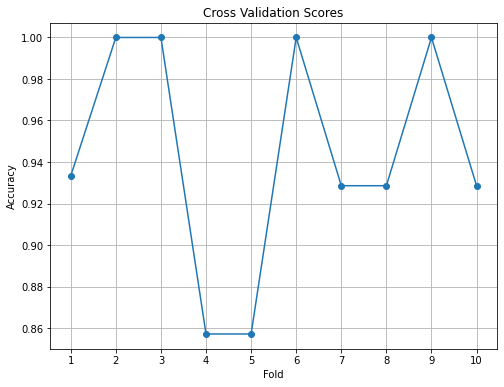

In [ ]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义 XGBoost 模型
xgboost_model = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, objective='binary:logistic')

# 进行十折交叉验证，返回十个验证准确率的数组
cross_val_scores = cross_val_score(xgboost_model, X_train, y_train, cv=10)

# 定义 X 轴的数据，即交叉验证的折数
x_values = range(1, 11)

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(x_values, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [ ]:
print("这十次的准确率分别是：\n",cross_val_scores)
print("这十次的准确率的均值是：\n",cross_val_scores.mean())

这十次的准确率分别是：
 [0.93333333 1.         1.         0.85714286 0.85714286 1.
 0.92857143 0.92857143 1.         0.92857143]
这十次的准确率的均值是：
 0.9433333333333334


# 选一个表现较好的模型，作为最终的模型并预测

In [ ]:
#训练一个机器学习模型，我们最终想要得到两个东西：
# 1.训练好的机器学习模型
# 2.在不知道标签的数据上，预测出标签。


# 这里我们没有真正的不知道标签的数据，但是我们假设测试集X_test的标签y_test是未知的，
# 用训练好的表现最好的机器学习模型对这部分数据进行预测，作为我们的结果。


## 预测结果

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 定义随机森林模型
random_forest_model = RandomForestClassifier(n_estimators=100)

# 在训练集上训练随机森林模型
random_forest_model.fit(X_train, y_train)

# 在测试集上进行预测
random_forest_y_pred = random_forest_model.predict(X_test)

# 计算随机森林模型的准确率
random_forest_accuracy = accuracy_score(y_test, random_forest_y_pred)
print("随机森林模型准确率：", random_forest_accuracy)
print("\n随机森林分类报告：")
print(classification_report(y_test, random_forest_y_pred))
print("标准答案是",y_test.values)
print("最后在测试集上的预测结果是",random_forest_y_pred)

#可以看出，预测结果和标准答案一模一样，准确率达到了100%。

随机森林模型准确率： 1.0

随机森林分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

标准答案是 [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
最后在测试集上的预测结果是 [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]


## 保存模型

In [ ]:
# 保存模型到文件
import joblib

# joblib 这个Python 库，用于储存数据，特别是涉及大量数据的机器学习模型。
joblib.dump(random_forest_model, 'random_forest_model.joblib')
# 把模型保存为一个名为random_forest_model.joblib的文件,就在这个文件夹下

# ”random_forest_model.joblib“这个文件中保存的是机器学习模型的属性和参数。
# 比如模型的结构、学习到的参数（例如，决策树的结构、支持向量机的支持向量等）


['random_forest_model.joblib']

## 重新读取训练好的模型

In [ ]:
random_forest_model = joblib.load('random_forest_model.joblib')

# 使用加载的模型进行预测
loaded_rf_y_pred = random_forest_model.predict(X_test)

# 计算加载的模型准确率
loaded_rf_y_pred_accuracy = accuracy_score(y_test, loaded_rf_y_pred)
print("加载的随机森林模型准确率：", loaded_rf_y_pred_accuracy)


加载的随机森林模型准确率： 1.0


# 数据标准化及效果对比

## 什么是数据标准化

In [ ]:
# 数据标准化/归一化是一种数据预处理方法。
# 数据标准化/归一化将数据调整为一定的范围
# 一般有两种：
# 1.缩到0到1之间（归一化）
# 2.让数据的均值为0，方差为1（标准化）


## 为什么要数据标准化

In [ ]:
#标准化的目的是消除数据中的单位尺度差异，使得特征之间可以公平比较，同时也能加快某些算法的收敛速度。

## 什么机器学习算法，对数据标准化比较敏感

In [ ]:
# 不是所有的机器学习方法对数据是否标准化都敏感。
# 比如，从上面的结果可以看出，基于树的算法（如决策树、随机森林和梯度提升机），在没有进行数据标准化的情况下，表现依旧很好。
# 这是因为，这些算法在做决策时主要考虑数据点的排序或分类而不是具体数值。

# 那么什么机器学习算法，对数据是否标准化比较敏感呢？
# 总的来说，以下两类机器学习方法对数据是否标准化比较敏感。
# 1.基于梯度的方法，如神经网络。
# 2.基于距离的算法：如K-近邻（KNN）、支持向量机（SVM）。

# 为什么这两类算法对数据是否标准化敏感呢？
# 因为这两类算法对数据的尺度和分布非常敏感。
# 所以，这两类算法在数据标准化后，效果可能会有很大的提升。

# 从上面的代码中，我们可以看到，KNN和SVM的效果相较于决策树，并不好。
# 下面我将以SVM模型为例，展示，数据标准化后，SVM的效果会有很大的提升。
# 大家也可以试试，其他模型，在数据标准化后的效果。



## 数据标准化后的模型效果前后对比

### 数据标准化

In [ ]:
# 通常使用Sklearn库中的StandardScaler对数据进行标准化(不用自己写公式的代码)
from sklearn.preprocessing import StandardScaler

# 初始化StandardScaler对象
scaler = StandardScaler()

# 用训练数据拟合scaler
scaler.fit(X_train)

# 转换训练集和测试集
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#查看原来的数据
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
106,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
92,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0


In [ ]:
#查看标准化后的数据，可以看到，数据变成了均值为0，方差为1的数据
X_train_scaled

array([[ 1.66529275, -0.60840587,  1.21896194, ..., -1.65632857,
        -0.87940904, -0.24860607],
       [-0.54952506,  2.7515415 ,  1.00331502, ..., -0.58463272,
        -1.25462095, -0.72992237],
       [-0.74531007, -1.14354109, -0.93750727, ...,  0.35845962,
         0.2462267 , -0.24860607],
       ...,
       [ 1.714239  , -0.44172441,  0.06884503, ...,  1.04434496,
         0.56585166,  2.69572196],
       [-0.35374006, -0.7399965 , -0.36244882, ...,  0.01551695,
        -0.74044166, -0.79631083],
       [-0.78201975,  0.06709269,  0.35637426, ..., -0.67036839,
         1.09392769, -0.98551793]])

### 数据标准化后，SVM的效果

In [ ]:
from sklearn.svm import SVC


svm_model = SVC(C=1, kernel='rbf')

# 在训练集上训练支持向量机模型
#注意，这里我已经把数据换成了标准化后的数据，X_train_scaled，而不是原来的X_train
svm_model.fit(X_train_scaled, y_train)

# 用刚才训练好的名字叫svm_model的svm模型，在测试集上进行预测
# 注意，这里我已经把测试数据换成了标准化后的数据，X_test_scaled，而不是原来的X_test
svm_y_pred = svm_model.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("\n数据标准化后的支持向量机模型准确率：", svm_accuracy)
print("\n数据标准化后的支持向量机分类报告：")
print(classification_report(y_test, svm_y_pred))


数据标准化后的支持向量机模型准确率： 1.0

数据标准化后的支持向量机分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



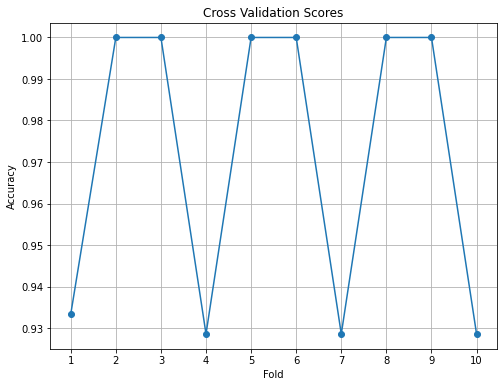

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义 svm 模型
svm_model = SVC(C=1, kernel='rbf')

# 进行十折交叉验证，返回十个验证准确率的数组
cross_val_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=10)

# 定义 X 轴的数据，即交叉验证的折数
x_values = range(1, 11)

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(x_values, cross_val_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.xticks(x_values)
plt.grid(True)
plt.show()

In [ ]:
print("这十次的准确率分别是：\n",cross_val_scores)
print("这十次的准确率的均值是：\n",cross_val_scores.mean())

## 可以看到，模型效果提升了非常多

这十次的准确率分别是：
 [0.93333333 1.         1.         0.92857143 1.         1.
 0.92857143 1.         1.         0.92857143]
这十次的准确率的均值是：
 0.971904761904762


### 让我们回忆一下，数据标准化之前SVM模型的效果

In [ ]:
from sklearn.svm import SVC


svm_model = SVC(C=1, kernel='rbf')

# 在训练集上训练支持向量机模型
#注意，这里我已经是原来的X_train
svm_model.fit(X_train, y_train)

# 用刚才训练好的名字叫svm_model的svm模型，在测试集上进行预测
svm_y_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("\n未进行数据标准化的支持向量机模型准确率：", svm_accuracy)
print("\n未进行数据标准化的支持向量机分类报告：")
print(classification_report(y_test, svm_y_pred))


未进行数据标准化的支持向量机模型准确率： 0.8055555555555556

未进行数据标准化的支持向量机分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36

